In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from aicsimageio import AICSImage
import pyvips
import os, time

In [3]:
DATA_DIR = "/raid/mpsych/AXOLOTL"
SCAN = "MRE11_30 LFL Slide 2(1).czi"
SHORT_SCAN = "MRE11_30"

OUTPUT_DIR = "web/" + SHORT_SCAN

In [4]:
img = AICSImage(os.path.join(DATA_DIR, SCAN))

In [5]:
img.dims

<Dimensions [T: 1, C: 2, Z: 1, Y: 57344, X: 38912]>

In [6]:
img.shape

(1, 2, 1, 57344, 38912)

In [7]:
stack = img.get_stack(select_scenes=img.scenes)

In [8]:
stack.shape

(1, 1, 2, 1, 57344, 38912)

In [9]:
r = stack[0,0,0,0,:,:]
g = stack[0,0,1,0,:,:]

In [10]:
r.shape, r.min(), r.max()

((57344, 38912), 599, 65535)

In [11]:
g.shape, g.min(), g.max()

((57344, 38912), 116, 65535)

In [12]:
b = g.copy() # fake 3rd channel

In [13]:
b.max()

65535

In [14]:
arr = np.stack([r,g,b], axis=2)

In [15]:
arr.shape

(57344, 38912, 3)

In [16]:
arr.dtype

dtype('uint16')

In [17]:
arr = arr.astype(float)
arr /= arr.max()

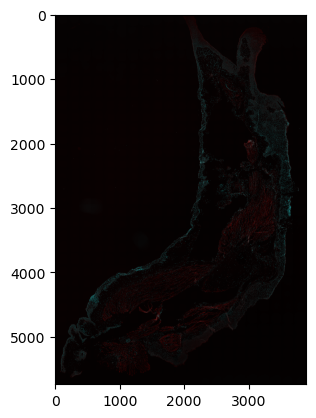

In [18]:
imshow(arr[::10,::10,:])

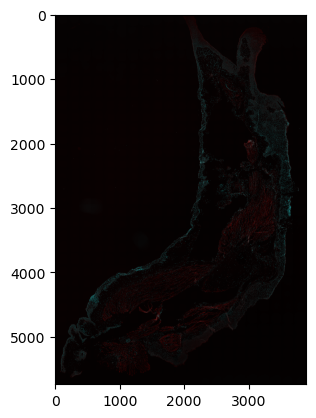

In [19]:
imshow(arr[::10,::10,:],vmax=0.005)

In [20]:
arr.min(), arr.max()

(0.001770046540016785, 1.0)

(array([[57344.,     0.,     0., ...,     0.,     0.,     0.],
        [57344.,     0.,     0., ...,     0.,     0.,     0.],
        [57344.,     0.,     0., ...,     0.,     0.,     0.],
        ...,
        [57344.,     0.,     0., ...,     0.,     0.,     0.],
        [57344.,     0.,     0., ...,     0.,     0.,     0.],
        [57344.,     0.,     0., ...,     0.,     0.,     0.]]),
 array([  116. ,  6657.9, 13199.8, 19741.7, 26283.6, 32825.5, 39367.4,
        45909.3, 52451.2, 58993.1, 65535. ]),
 <a list of 38912 BarContainer objects>)

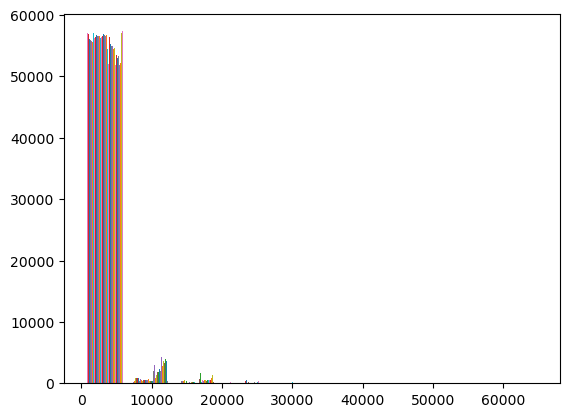

In [21]:
plt.hist(g)

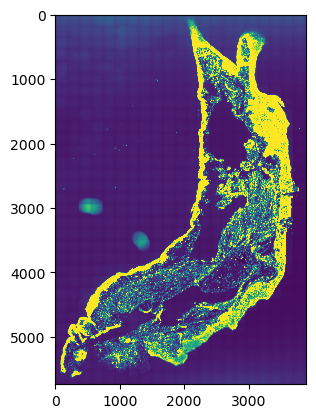

In [22]:
imshow(g[::10,::10],vmax=3000)

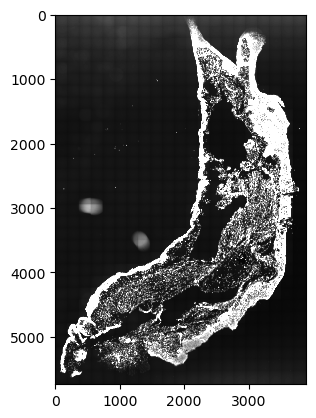

In [23]:
imshow(g[::10,::10],vmax=3000, cmap='gray')

(array([[57344.,     0.,     0., ...,     0.,     0.,     0.],
        [57344.,     0.,     0., ...,     0.,     0.,     0.],
        [57344.,     0.,     0., ...,     0.,     0.,     0.],
        ...,
        [57344.,     0.,     0., ...,     0.,     0.,     0.],
        [57344.,     0.,     0., ...,     0.,     0.,     0.],
        [57344.,     0.,     0., ...,     0.,     0.,     0.]]),
 array([  599. ,  7092.6, 13586.2, 20079.8, 26573.4, 33067. , 39560.6,
        46054.2, 52547.8, 59041.4, 65535. ]),
 <a list of 38912 BarContainer objects>)

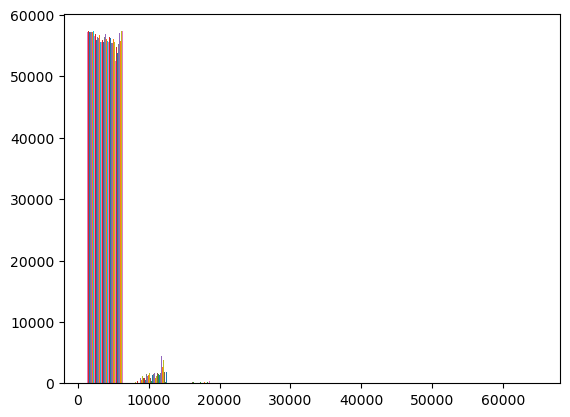

In [24]:
plt.hist(r)

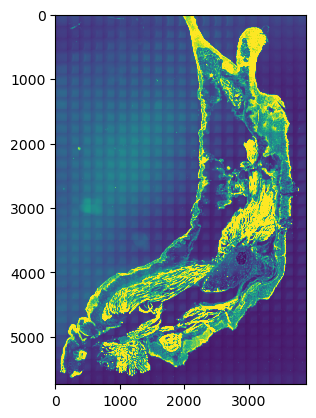

In [25]:
imshow(r[::10,::10],vmax=5000)

In [26]:
maxval = 3000
r_n = r.astype(float) / maxval
g_n = g.astype(float) / maxval
b_n = b.astype(float) / maxval

In [27]:
arr_n = np.stack([r_n,g_n,b_n], axis=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


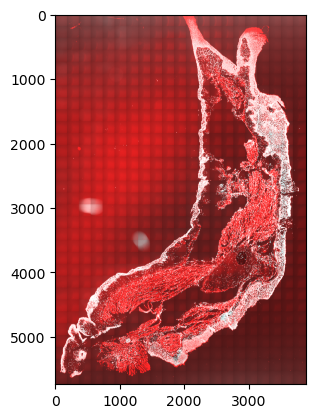

In [28]:
imshow(arr_n[::10,::10,:])

In [29]:
arr_n[3000,3000]

array([0.50233333, 0.213     , 0.213     ])

In [30]:
arr_n2 = np.stack([r_n,r_n,r_n], axis=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


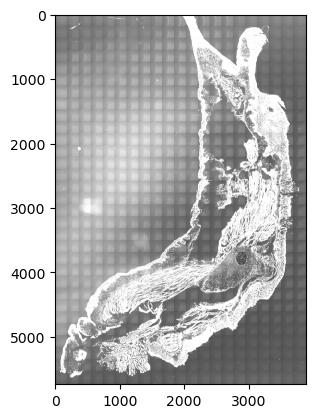

In [31]:
imshow(arr_n2[::10,::10,:])